In [21]:
import pandas as pd
import numpy as np

# Target and Features selection

In [22]:
df = pd.read_pickle("../data/processed/full_df")

In [24]:
target = "Attrition"  # nan values 
features = ['Age', 'DailyRate', 'DistanceFromHome', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'TotalWorkingYears']

In [25]:
X = df[features]
y = df[target]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# fill na with most frequent value
y_train = y_train.fillna(y_train.value_counts().index[0])
y_test = y_test.fillna(y_test.value_counts().index[0])

<AxesSubplot:>

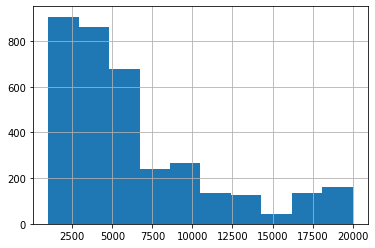

In [26]:
X_train["MonthlyIncome"].hist()

<AxesSubplot:>

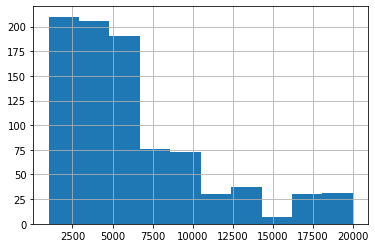

In [27]:
X_test["MonthlyIncome"].hist()

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

num_attr = X.select_dtypes(include='number').columns
cat_attr = X.select_dtypes(exclude='number').columns

numeric_pipeline = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='median')),
        ("std_scaler", StandardScaler()),
    ]
)

category_pipeline = Pipeline(
    [
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('ohe', OneHotEncoder())
    ]
)

full_pipeline = ColumnTransformer(
    [
        ("numerical", numeric_pipeline, num_attr),
        ("categorical", category_pipeline, cat_attr)
    ]
)

In [29]:
X_train_tr = full_pipeline.fit_transform(X_train)
X_test_tr = full_pipeline.fit_transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [31]:
import src.helping_functions as hf

### Decision tree

train classification report
              precision    recall  f1-score   support

           0       0.57      0.38      0.45      1677
           1       0.57      0.74      0.65      1882

    accuracy                           0.57      3559
   macro avg       0.57      0.56      0.55      3559
weighted avg       0.57      0.57      0.56      3559


test classification report
              precision    recall  f1-score   support

           0       0.50      0.34      0.40       403
           1       0.57      0.72      0.64       487

    accuracy                           0.55       890
   macro avg       0.53      0.53      0.52       890
weighted avg       0.54      0.55      0.53       890

train classification report

test classification report


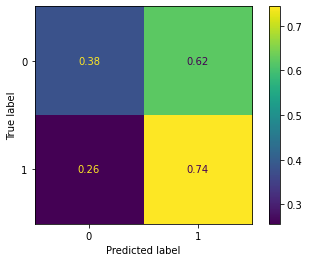

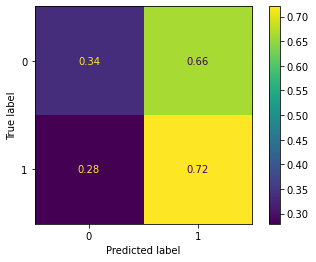

In [32]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=42)
dt.fit(X_train_tr, y_train)

y_pred_dt_tr = dt.predict(X_train_tr)
y_pred_dt_ts = dt.predict(X_test_tr)

hf.print_classification_report(y_train, y_pred_dt_tr, y_test, y_pred_dt_ts)
hf.plot_conf_matrix(y_train, y_pred_dt_tr, y_test, y_pred_dt_ts)

### Random Forest

train classification report
              precision    recall  f1-score   support

           0       0.70      0.24      0.36      1677
           1       0.57      0.91      0.70      1882

    accuracy                           0.59      3559
   macro avg       0.64      0.57      0.53      3559
weighted avg       0.63      0.59      0.54      3559


test classification report
              precision    recall  f1-score   support

           0       0.48      0.16      0.24       403
           1       0.55      0.85      0.67       487

    accuracy                           0.54       890
   macro avg       0.52      0.51      0.46       890
weighted avg       0.52      0.54      0.48       890

train classification report

test classification report


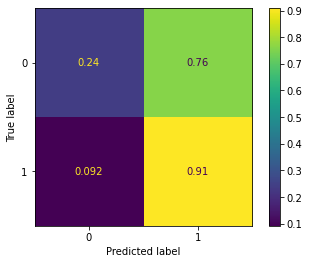

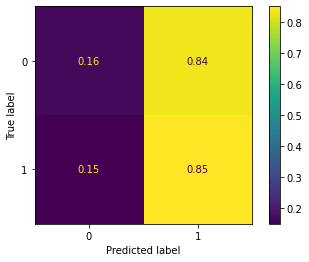

In [33]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=7, random_state=42)
rf.fit(X_train_tr, y_train)

y_pred_rf_tr = rf.predict(X_train_tr)
y_pred_rf_ts = rf.predict(X_test_tr)

hf.print_classification_report(y_train, y_pred_rf_tr, y_test, y_pred_rf_ts)
hf.plot_conf_matrix(y_train, y_pred_rf_tr, y_test, y_pred_rf_ts)

### AdaBoost

train classification report
              precision    recall  f1-score   support

           0       0.60      0.47      0.53      1677
           1       0.61      0.72      0.66      1882

    accuracy                           0.60      3559
   macro avg       0.60      0.60      0.59      3559
weighted avg       0.60      0.60      0.60      3559


test classification report
              precision    recall  f1-score   support

           0       0.48      0.40      0.44       403
           1       0.56      0.64      0.60       487

    accuracy                           0.53       890
   macro avg       0.52      0.52      0.52       890
weighted avg       0.53      0.53      0.53       890

train classification report

test classification report


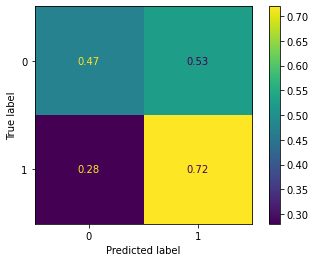

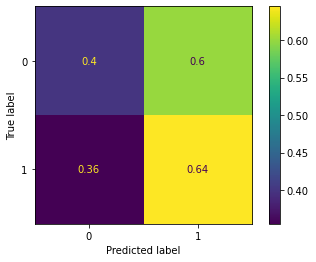

In [34]:
ada = AdaBoostClassifier(n_estimators=150)
ada.fit(X_train_tr, y_train)

y_pred_ada_tr = ada.predict(X_train_tr)
y_pred_ada_ts = ada.predict(X_test_tr)

hf.print_classification_report(y_train, y_pred_ada_tr, y_test, y_pred_ada_ts)
hf.plot_conf_matrix(y_train, y_pred_ada_tr, y_test, y_pred_ada_ts)

### Gradient Boost

train classification report
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1677
           1       0.77      0.79      0.78      1882

    accuracy                           0.77      3559
   macro avg       0.77      0.77      0.77      3559
weighted avg       0.77      0.77      0.77      3559


test classification report
              precision    recall  f1-score   support

           0       0.47      0.47      0.47       403
           1       0.56      0.56      0.56       487

    accuracy                           0.52       890
   macro avg       0.52      0.52      0.52       890
weighted avg       0.52      0.52      0.52       890

train classification report

test classification report


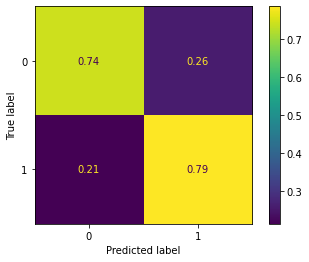

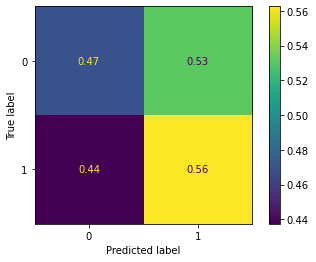

In [35]:
gb = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=5, min_samples_split=5)
gb.fit(X_train_tr, y_train)

y_pred_gb_tr = gb.predict(X_train_tr)
y_pred_gb_ts = gb.predict(X_test_tr)

hf.print_classification_report(y_train, y_pred_gb_tr, y_test, y_pred_gb_ts)
hf.plot_conf_matrix(y_train, y_pred_gb_tr, y_test, y_pred_gb_ts)

### Logistic Regression

train classification report
              precision    recall  f1-score   support

           0       0.51      0.33      0.40      1677
           1       0.54      0.71      0.62      1882

    accuracy                           0.53      3559
   macro avg       0.52      0.52      0.51      3559
weighted avg       0.53      0.53      0.51      3559


test classification report
              precision    recall  f1-score   support

           0       0.48      0.33      0.39       403
           1       0.56      0.71      0.62       487

    accuracy                           0.53       890
   macro avg       0.52      0.52      0.51       890
weighted avg       0.52      0.53      0.52       890

train classification report

test classification report


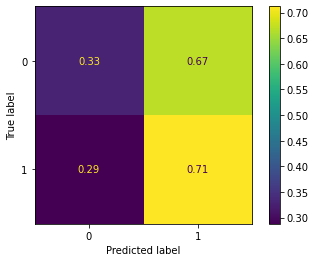

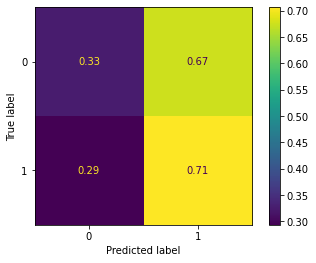

In [36]:
lr = LogisticRegression()
lr.fit(X_train_tr, y_train)

y_pred_lr_tr = lr.predict(X_train_tr)
y_pred_lr_ts = lr.predict(X_test_tr)

hf.print_classification_report(y_train, y_pred_lr_tr, y_test, y_pred_lr_ts)
hf.plot_conf_matrix(y_train, y_pred_lr_tr, y_test, y_pred_lr_ts)

### svc

train classification report
              precision    recall  f1-score   support

           0       0.65      0.44      0.52      1677
           1       0.61      0.79      0.69      1882

    accuracy                           0.62      3559
   macro avg       0.63      0.61      0.61      3559
weighted avg       0.63      0.62      0.61      3559


test classification report
              precision    recall  f1-score   support

           0       0.47      0.31      0.37       403
           1       0.55      0.71      0.62       487

    accuracy                           0.53       890
   macro avg       0.51      0.51      0.50       890
weighted avg       0.51      0.53      0.51       890

train classification report

test classification report


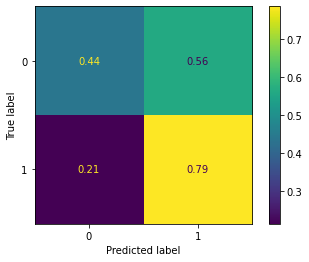

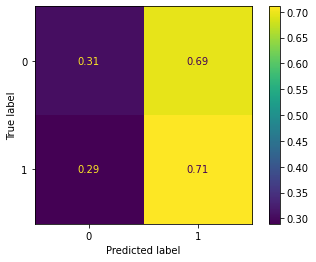

In [37]:
svc = SVC(kernel="rbf")
svc.fit(X_train_tr, y_train)

y_pred_svc_tr = svc.predict(X_train_tr)
y_pred_svc_ts = svc.predict(X_test_tr)

hf.print_classification_report(y_train, y_pred_svc_tr, y_test, y_pred_svc_ts)
hf.plot_conf_matrix(y_train, y_pred_svc_tr, y_test, y_pred_svc_ts)

Fine-tuning Random Forest

In [38]:
grid_params = [
    {
        "n_estimators": [100,1000],
        # "max_depth": [4,5,6],
        # "min_samples_split": [3,5,7,9],
    }
]

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(ada, grid_params, cv=10, verbose=0, scoring="f1")
grid_search.fit(X_train_tr, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(n_estimators=150),
             param_grid=[{'n_estimators': [100, 1000]}], scoring='f1')

In [39]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.160524,0.003934,0.005247,0.000132,100,{'n_estimators': 100},0.568475,0.606965,0.581560,0.551220,0.578313,0.559796,0.597156,0.613953,0.625592,0.557214,0.584025,0.024464,1
1,1.648738,0.033391,0.048257,0.001240,1000,{'n_estimators': 1000},0.568365,0.569231,0.544554,0.530303,0.569231,0.485333,0.572840,0.574209,0.566416,0.532663,0.551315,0.027087,2
